# 04_Liquidity_Assessment.ipynb

## Title: "Liquidity Analysis"

### Contents:

- Liquidity metrics exploration from SEC data.
- Cross-checking with liquidity_query.sql.
- Computing liquidity ratios.
- Visualizing cash flow and liquidity trends.

---

# Set Up the Environment

## Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output


## Functions

In [24]:
def prepare_and_sort_financial_data(df, metric):
    """
    Prepares and sorts financial data for a specific metric.

    Args:
    df (DataFrame): The raw DataFrame containing financial data.
    metric (str): The specific financial metric to prepare and sort (e.g., 'OperatingIncomeLoss').

    Returns:
    DataFrame: A DataFrame filtered, cleaned, and sorted for the specific metric.
    """
    # Filter by Metric
    df_metric = df[df['Metric'] == metric]

    # Filter for 10-K filings and ensure 'frame' column is not empty
    filtered_df = df_metric[df_metric['form'] == '10-K']
    filtered_df = filtered_df[filtered_df['frame'].notna()]

    # Drop unnecessary columns
    columns_to_drop = ['accn', 'fy', 'fp', 'form', 'filed']
    filtered_df_cleaned = filtered_df.drop(columns=columns_to_drop)

    # Define a custom sorting key and split into 'year' and 'quarter'
    def custom_sort_key(frame_value):
        year = frame_value[2:6]  # Extract the year part (e.g., '2007')
        quarter_order = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4, 'FY': 5}  # Define order for quarters and FY
        quarter = frame_value[6:] if frame_value[6:] in quarter_order else 'FY'
        return (year, quarter_order[quarter])

    filtered_df_cleaned[['year', 'quarter']] = filtered_df_cleaned['frame'].apply(custom_sort_key).apply(pd.Series)

    # Sort the DataFrame and drop the 'frame' and 'frame_sort_key' columns
    sorted_df = filtered_df_cleaned.sort_values(by=['year', 'quarter']).drop(columns=['frame'])

    return sorted_df

# Example usage with multiple metrics
# operating_income_loss_data = prepare_and_sort_financial_data(raw_data, 'OperatingIncomeLoss')
# net_income_loss_data = prepare_and_sort_financial_data(raw_data, 'NetIncomeLoss')
# revenues_data = prepare_and_sort_financial_data(raw_data, 'Revenues')


# Load Data

## Load Data from CSV File

In [25]:
raw_data = pd.read_csv('combined_df.csv')

In [26]:
# Inspect the first few rows of the dataset
raw_data.head(2)

,EntityName,CIK,Metric,end,val,accn,fy,fp,form,filed,frame
0,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,0001193125-09-152905,2009,Q2,10-Q,2009-07-22,NaN
1,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,0001193125-09-210918,2009,Q3,10-Q,2009-10-21,NaN


In [27]:
# Convert 'end' column to datetime for proper sorting
raw_data['end'] = pd.to_datetime(raw_data['end'], format='%Y-%m-%d')


In [28]:
# Check the data types and look for any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   EntityName  232 non-null    object        
 1   CIK         232 non-null    int64         
 2   Metric      232 non-null    object        
 3   end         232 non-null    datetime64[ns]
 4   val         232 non-null    int64         
 5   accn        232 non-null    object        
 6   fy          232 non-null    int64         
 7   fp          232 non-null    object        
 8   form        232 non-null    object        
 9   filed       232 non-null    object        
 10  frame       118 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 20.1+ KB


# Individual Metrics Analysis

## Analysis of AssetsCurrent

In [29]:
# Filter out the Assets
assets = raw_data[raw_data['Metric'] == 'AssetsCurrent']

In [30]:
assets_data = prepare_and_sort_financial_data(raw_data, 'AssetsCurrent')

In [31]:
assets_data.head(2)

,EntityName,CIK,Metric,end,val,year,quarter
2,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,2008,5
9,THE BOEING COMPANY,12927,AssetsCurrent,2009-12-31,35275000000,2009,5


In [32]:
print(assets_data.describe())

           CIK                            end           val  quarter
count     14.0                             14  1.400000e+01     14.0
mean   12927.0  2015-07-01 18:51:25.714285824  6.986100e+10      5.0
min    12927.0            2008-12-31 00:00:00  2.596400e+10      5.0
25%    12927.0            2012-03-31 12:00:00  5.168475e+10      5.0
50%    12927.0            2015-07-01 12:00:00  6.642050e+10      5.0
75%    12927.0            2018-09-30 18:00:00  8.717100e+10      5.0
max    12927.0            2021-12-31 00:00:00  1.216420e+11      5.0
std        0.0                            NaN  2.830828e+10      0.0


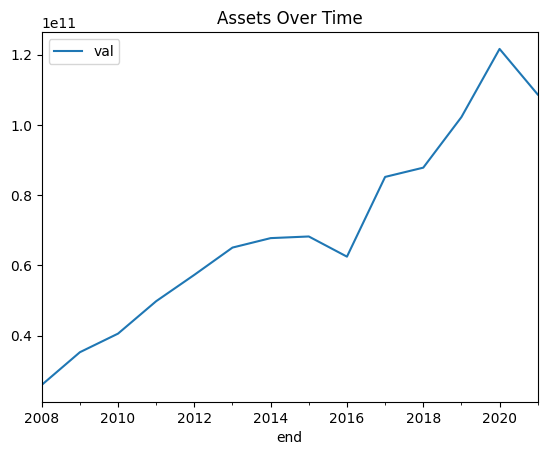

In [33]:
assets_data.plot(x='end', y='val', title='Assets Over Time')
plt.show()

## Analysis of LiabilitiesCurrent

In [34]:
# Filter out the Liabilities data
liabilities = raw_data[raw_data['Metric'] == 'LiabilitiesCurrent']

In [35]:
liabilities_data = prepare_and_sort_financial_data(raw_data, 'LiabilitiesCurrent')

In [36]:
liabilities_data.head(2)

,EntityName,CIK,Metric,end,val,year,quarter
118,THE BOEING COMPANY,12927,LiabilitiesCurrent,2008-12-31,30773000000,2008,5
125,THE BOEING COMPANY,12927,LiabilitiesCurrent,2009-12-31,32883000000,2009,5


           CIK                            end           val  quarter
count     14.0                             14  1.400000e+01     14.0
mean   12927.0  2015-07-01 18:51:25.714285824  5.774243e+10      5.0
min    12927.0            2008-12-31 00:00:00  3.077300e+10      5.0
25%    12927.0            2012-03-31 12:00:00  4.220100e+10      5.0
50%    12927.0            2015-07-01 12:00:00  5.027300e+10      5.0
75%    12927.0            2018-09-30 18:00:00  7.985450e+10      5.0
max    12927.0            2021-12-31 00:00:00  9.731200e+10      5.0
std        0.0                            NaN  2.218930e+10      0.0


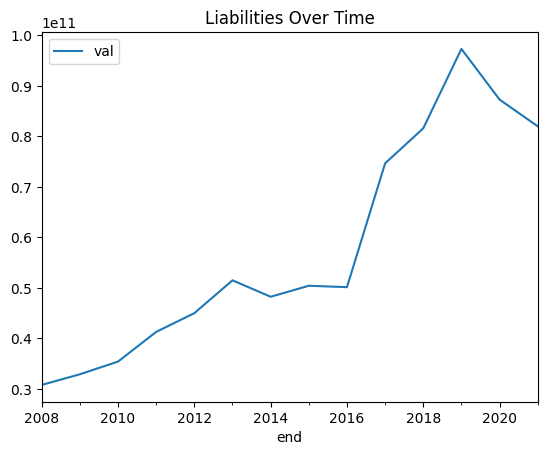

In [37]:
print(liabilities_data.describe())
liabilities_data.plot(x='end', y='val', title='Liabilities Over Time')
plt.show()


# Merge the Data

In [38]:
df_merged = pd.merge(assets_data, liabilities_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer', suffixes=('_assets', '_liabilities'))

In [39]:
df_merged = pd.merge(df_merged, liabilities_data, 
                     on=['EntityName', 'CIK', 'end', 'year', 'quarter'], 
                     how='outer')
                     

In [40]:
df_merged.rename(columns={'val_assets': 'CurrentAssets', 
                          'val_liabilities': 'CurrentLiabilities'}, inplace=True)

In [23]:
# Filtering out the annual data (rows where quarter is '5')
#df_merged_quarterly = df_merged[df_merged['quarter']] != 5]

In [41]:
df_merged

,EntityName,CIK,Metric_assets,end,CurrentAssets,year,quarter,Metric_liabilities,CurrentLiabilities,Metric,val
0,THE BOEING COMPANY,12927,AssetsCurrent,2008-12-31,25964000000,2008,5,LiabilitiesCurrent,30773000000,LiabilitiesCurrent,30773000000
1,THE BOEING COMPANY,12927,AssetsCurrent,2009-12-31,35275000000,2009,5,LiabilitiesCurrent,32883000000,LiabilitiesCurrent,32883000000
2,THE BOEING COMPANY,12927,AssetsCurrent,2010-12-31,40572000000,2010,5,LiabilitiesCurrent,35395000000,LiabilitiesCurrent,35395000000
3,THE BOEING COMPANY,12927,AssetsCurrent,2011-12-31,49810000000,2011,5,LiabilitiesCurrent,41274000000,LiabilitiesCurrent,41274000000
4,THE BOEING COMPANY,12927,AssetsCurrent,2012-12-31,57309000000,2012,5,LiabilitiesCurrent,44982000000,LiabilitiesCurrent,44982000000
5,THE BOEING COMPANY,12927,AssetsCurrent,2013-12-31,65074000000,2013,5,LiabilitiesCurrent,51486000000,LiabilitiesCurrent,51486000000
6,THE BOEING COMPANY,12927,AssetsCurrent,2014-12-31,67767000000,2014,5,LiabilitiesCurrent,48233000000,LiabilitiesCurrent,48233000000
7,THE BOEING COMPANY,12927,AssetsCurrent,2015-12-31,68234000000,2015,5,LiabilitiesCurrent,50412000000,LiabilitiesCurrent,50412000000
8,THE BOEING COMPANY,12927,AssetsCurrent,2016-12-31,62488000000,2016,5,LiabilitiesCurrent,50134000000,LiabilitiesCurrent,50134000000
9,THE BOEING COMPANY,12927,AssetsCurrent,2017-12-31,85194000000,2017,5,LiabilitiesCurrent,74648000000,LiabilitiesCurrent,74648000000


# Calculation

**Liquidity:**
    
    - `AssetsCurrent` (Current Assets)
    - `LiabilitiesCurrent` (Current Liabilities)
    - **Calculation:** Current Ratio = Current Assets / Current Liabilities to evaluate short-term financial stability.

In [42]:
# Start by creating a copy of the DataFrame to avoid SettingWithCopyWarning
df_final = df_merged.copy()

In [26]:
# Convert financial values from cents to millions for readability
df_final['CurrentAssets'] /= 1000000
df_final['CurrentLiabilities'] /= 1000000

In [43]:
# Calculate the Current Ratio
# Ensure that division by zero is handled by replacing zero denominators with NaN
df_final['CurrentRatio'] = df_final.apply(lambda row: row['CurrentAssets'] / row['CurrentLiabilities'] 
                                          if row['CurrentLiabilities'] > 0 
                                          else None, axis=1)

In [44]:
# Construct the 'Quarter' column
df_final['Quarter'] = df_final['year'].astype(str) + '-Q' + df_final['quarter'].astype(str)
# Construct the 'Quarter' column for annual data
#df_final['Quarter'] = 'FY-' + df_final['year'].astype(str)

In [46]:
# Selecting and renaming columns to match the desired format
df_final = df_final[['EntityName', 'CIK', 'end', 'CurrentAssets', 'CurrentLiabilities', 'CurrentRatio', 'Quarter']]


In [47]:
df_copy = df_final.copy()
df_copy.rename(columns={'EntityName': 'ENTITY', 'end': 'DATE'}, inplace=True)

In [49]:
df_copy

,ENTITY,CIK,DATE,CurrentAssets,CurrentLiabilities,CurrentRatio,Quarter
0,THE BOEING COMPANY,12927,2008-12-31,25964000000,30773000000,0.843727,2008-Q5
1,THE BOEING COMPANY,12927,2009-12-31,35275000000,32883000000,1.072743,2009-Q5
2,THE BOEING COMPANY,12927,2010-12-31,40572000000,35395000000,1.146264,2010-Q5
3,THE BOEING COMPANY,12927,2011-12-31,49810000000,41274000000,1.206813,2011-Q5
4,THE BOEING COMPANY,12927,2012-12-31,57309000000,44982000000,1.274043,2012-Q5
5,THE BOEING COMPANY,12927,2013-12-31,65074000000,51486000000,1.263916,2013-Q5
6,THE BOEING COMPANY,12927,2014-12-31,67767000000,48233000000,1.404992,2014-Q5
7,THE BOEING COMPANY,12927,2015-12-31,68234000000,50412000000,1.353527,2015-Q5
8,THE BOEING COMPANY,12927,2016-12-31,62488000000,50134000000,1.246420,2016-Q5
9,THE BOEING COMPANY,12927,2017-12-31,85194000000,74648000000,1.141276,2017-Q5


# Visualization

In [51]:
import dash 

# Convert DATE to datetime and sort
df_copy = df_copy.copy()
df_copy['DATE'] = pd.to_datetime(df_copy['DATE'])
df_copy.sort_values(by='DATE', inplace=True)

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Boeing Company's Current Ratio Analysis"),
    dcc.Graph(id='current-ratio-time-series'),
    dcc.RangeSlider(
        id='year-slider',
        min=df_copy['DATE'].dt.year.min(),
        max=df_copy['DATE'].dt.year.max(),
        value=[df_copy['DATE'].dt.year.min(), df_copy['DATE'].dt.year.max()],
        marks={str(year): str(year) for year in df_copy['DATE'].dt.year.unique()},
        step=None
    )
])

# Callback for the time series plot
@app.callback(
    Output('current-ratio-time-series', 'figure'),
    [Input('year-slider', 'value')])
def update_time_series(selected_years):
    filtered_df = df_copy[df_copy['DATE'].dt.year.between(*selected_years)]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=filtered_df['DATE'], y=filtered_df['CurrentRatio'], mode='lines+markers', name='Current Ratio'))
    fig.update_layout(title='Current Ratio Over Time', xaxis_title='Year', yaxis_title='Current Ratio')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
